# ANN Based on diabetes prediction using Pytorch.

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')   #### Importing the PIMA Indian Diabetes Dataset from Kaggle
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
import seaborn as sns

In [4]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic") 
### replacing quantitative values with qualitative values

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


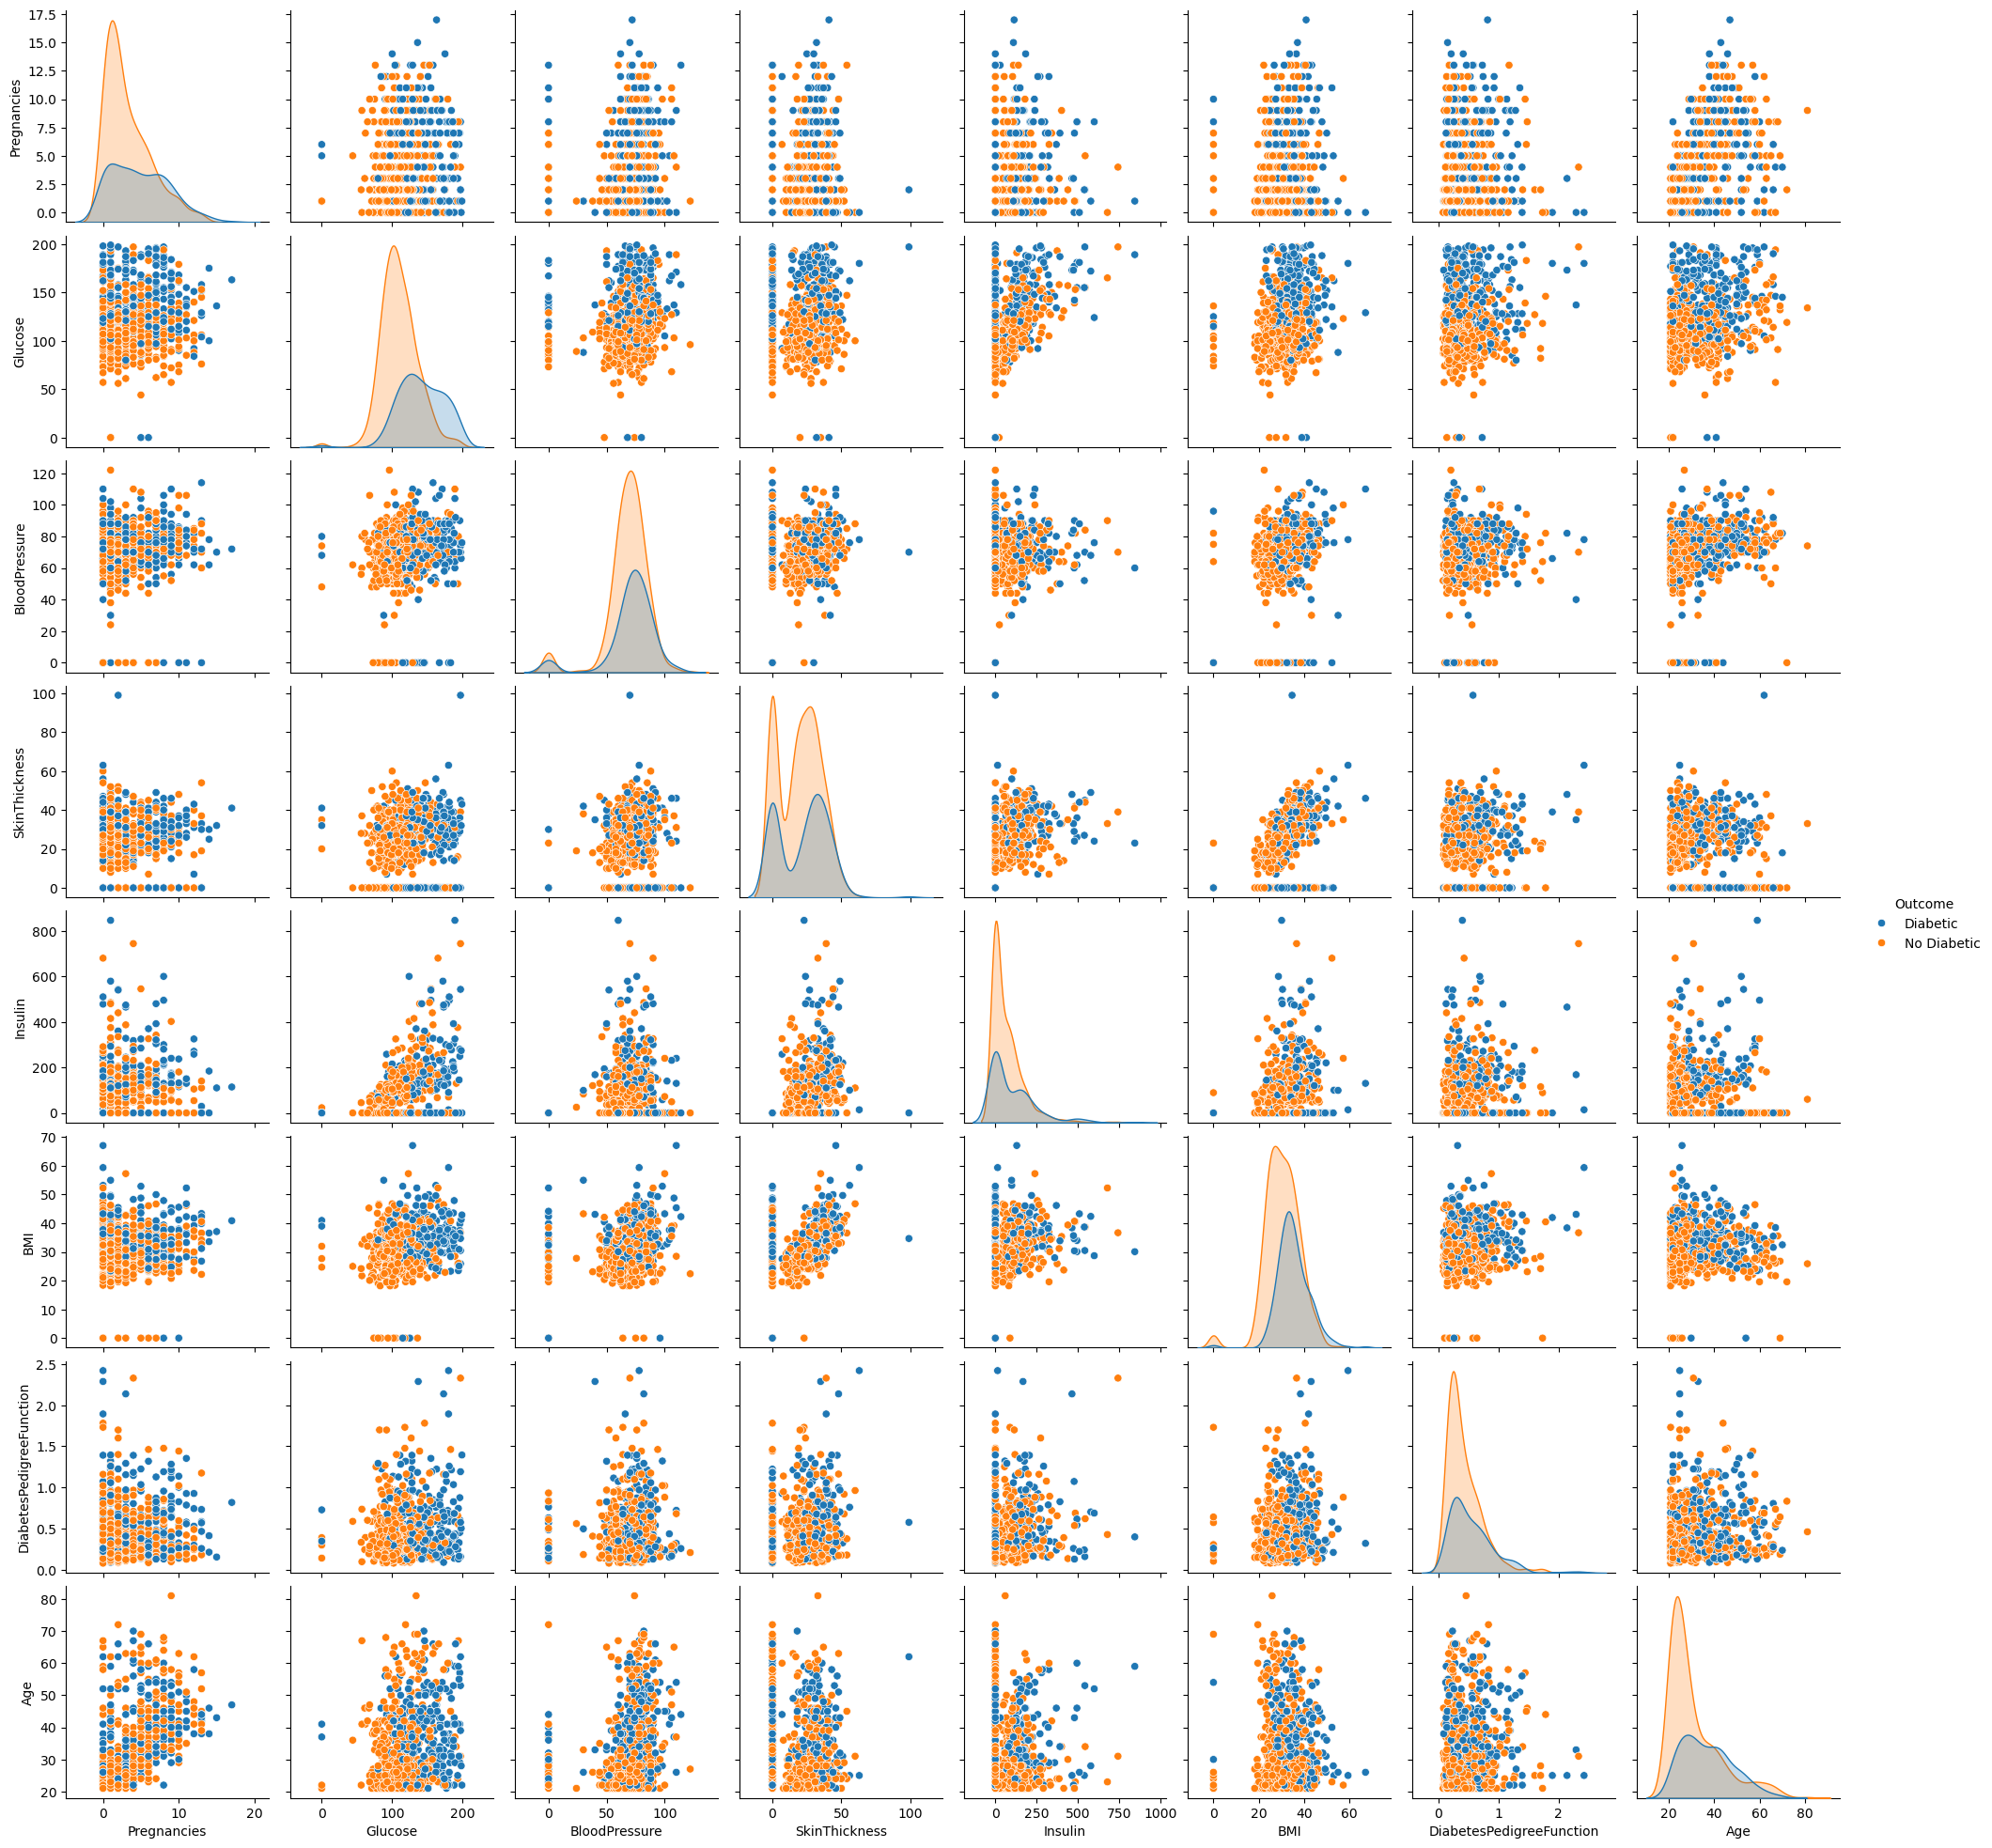

In [6]:
sns.pairplot(df,hue="Outcome")
#### Ploting how all parameters correlate with each other using seaborn pairplot

In [7]:
df = pd.read_csv('diabetes.csv')
df.head()
#### Visualizing the format in which the data is present.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#### Defining the dependent and independent features
X = df.drop('Outcome',axis=1).values ### independent features
y = df['Outcome'].values #### dependent features

In [9]:
### Defining the train test split for machine learning(ANN)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
#### Import the necessary libraries from Pytorch for model training
import torch
import torch.nn as nn
import torch.nn.functional as F

In [11]:
##### Creating tensors for model training
X_train = torch.FloatTensor(X_train) ### independent feature should always be a float tensor
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
df.shape

(768, 9)

In [13]:
##### Creation of Model (ANN) using Pytorch

class ANN_Model(nn.Module):  #### Defining the hidden and connected features for adjusting accuracy
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):    ### Forward Propogation
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x  
    

In [14]:
#### instantiating the ANN Model
torch.manual_seed(20)
model=ANN_Model()

In [15]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [16]:
### Backward Propagation - Defining the loss function and Defining the Optimizer.
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [17]:
#### Running the loss function in for loop to optimize the model and increase the accuracy of prediction
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number : {} and the Loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number : 1 and the Loss : 3.4572105407714844
Epoch number : 11 and the Loss : 0.8019208908081055
Epoch number : 21 and the Loss : 0.6090320348739624
Epoch number : 31 and the Loss : 0.5917770862579346
Epoch number : 41 and the Loss : 0.5679707527160645
Epoch number : 51 and the Loss : 0.5529041886329651
Epoch number : 61 and the Loss : 0.5410094857215881
Epoch number : 71 and the Loss : 0.5310389995574951
Epoch number : 81 and the Loss : 0.5220361351966858
Epoch number : 91 and the Loss : 0.5135971903800964
Epoch number : 101 and the Loss : 0.5061255097389221
Epoch number : 111 and the Loss : 0.49834102392196655
Epoch number : 121 and the Loss : 0.49605512619018555
Epoch number : 131 and the Loss : 0.4828636944293976
Epoch number : 141 and the Loss : 0.4756036400794983
Epoch number : 151 and the Loss : 0.48334676027297974
Epoch number : 161 and the Loss : 0.48827388882637024
Epoch number : 171 and the Loss : 0.4693359434604645
Epoch number : 181 and the Loss : 0.466261625289917
E

In [18]:
#### Plotting and Visualizing the loss function
import matplotlib.pyplot as plt
%matplotlib inline

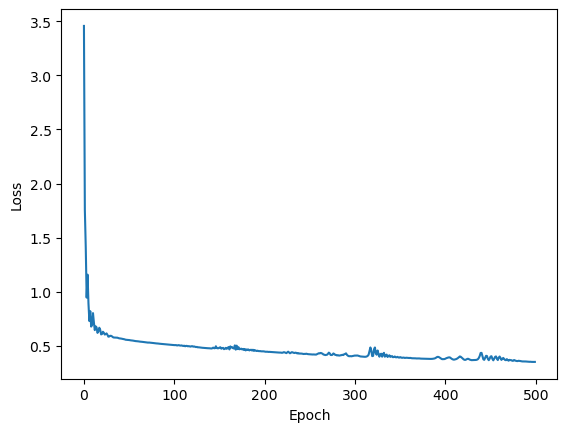

In [19]:
plt.plot(range(epochs),[loss.detach().numpy() for loss in final_losses])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [20]:
### Prediction in X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[92, 15],
       [17, 30]])

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Values')

Text(95.72222222222221, 0.5, 'Predicted Values')

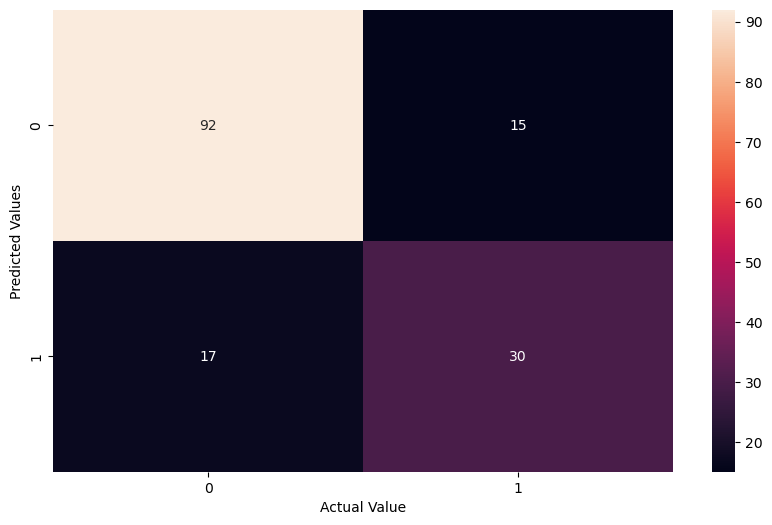

In [23]:
plt.show() #### Showing the heatmap of the confusion matrix

In [24]:
###showing the accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7922077922077922

In [25]:
### Saving the model
torch.save(model,'diabetes.pt')

In [26]:
### Save and load the model
model = torch.load('diabetes.pt', weights_only=False)

In [27]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [28]:
### Prediction of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [29]:
### New Data
lst1 = [4.0, 80.0, 120.0, 30.0, 10.0, 25.0, 0.110, 45.0]

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
new_data=torch.tensor(lst1)

In [32]:
#### Prediction of new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([ 9.2243, -7.5614])
0
